# KMeans Clustering

## Import necessary libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

## Helper function

In [2]:
def visualize(title, centroid=True, clustered=False):
    plt.style.use('ggplot')
    G = gridspec.GridSpec(2, 3)
    fig = plt.figure(figsize=(20,8))
    sub1 = plt.subplot(G[0:, :-1])
    sub1.set_xticks(np.arange(0,6,0.5))
    sub1.set_yticks(np.arange(0,8,0.5))
    sub1.scatter(A, B, s=100)
    if clustered == True:
        sub1.scatter(*zip(*c1), c='red', s=100, label='cluster 1')
        sub1.scatter(*zip(*c2), c='green', s=100, label='cluster 2')
        sub1.legend(loc='upper left', fontsize=18)
    sub1.set_title(title)
    sub1.set_xlabel('A')
    sub1.set_ylabel('B')
    if centroid == True:
        sub1.plot(centroids[0][0], centroids[0][1], marker='x', 
                  markersize=22, c='black', label='centroid')
        sub1.plot(centroids[1][0], centroids[1][1], marker='x', 
                  markersize=22, c='black', label='centroid')
        sub2 = plt.subplot(G[0:-1, -1])
        sub2.xaxis.set_visible(False)
        sub2.yaxis.set_visible(False)
        sub2.set_title('Centroids')
        sub2.set_axis_bgcolor('white')
        table = sub2.table(cellText=centroids, 
                           colLabels=['x', 'y'], 
                           rowLabels=['Cent. 1', 'Cent. 2'], 
                           colWidths=[0.25, 0.25], 
                           cellLoc = 'center', 
                           loc='center')
        table.set_fontsize(18)
        table.scale(1, 4)
    plt.show()

## Implement KMeans

In [3]:
class KMeans(object):
    """KMeans algorithm with two centroids"""
    def __init__(self, centroids, points):
        self.centroids = centroids  # Initial centroids
        self.points = points
    
    def getCentroids(self):
        return self.centroids
    
    def calculateDistance(self, p1, p2):
        h = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2
        e = np.sqrt(h)
        return e
    
    def cluster(self):
        c1 = []
        c2 = []
        for p in self.points:
            d1 = self.calculateDistance(p, self.centroids[0])
            d2 = self.calculateDistance(p, self.centroids[1])
            if d1 < d2:
                c1.append(p)
            else:
                c2.append(p)
        return c1, c2
    
    def updateCentroids(self):
        c1, c2 = self.cluster()
        self.centroids = [(np.mean([p[0] for p in c1]), 
                           np.mean([p[1] for p in c1])),
                          (np.mean([p[0] for p in c2]), 
                           np.mean([p[1] for p in c2]))]

## Data Preparation

In [4]:
A = [1.0, 1.5, 3.0, 3.5, 3.5, 4.5, 5.0]
B = [1.0, 2.0, 4.0, 4.5, 5.0, 5.0, 7.0]
centroids = [(1.0, 1.0), (5.0, 7.0)]

## Initial data points

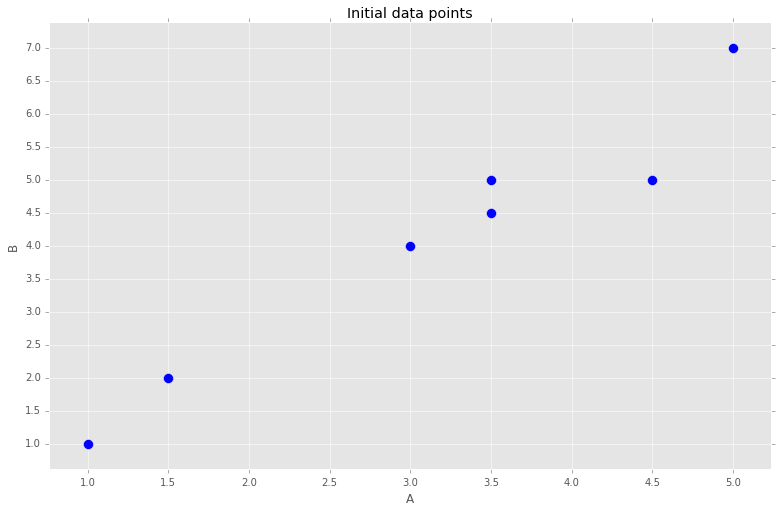

In [5]:
visualize('Initial data points', centroid=False)

## Initial centroids

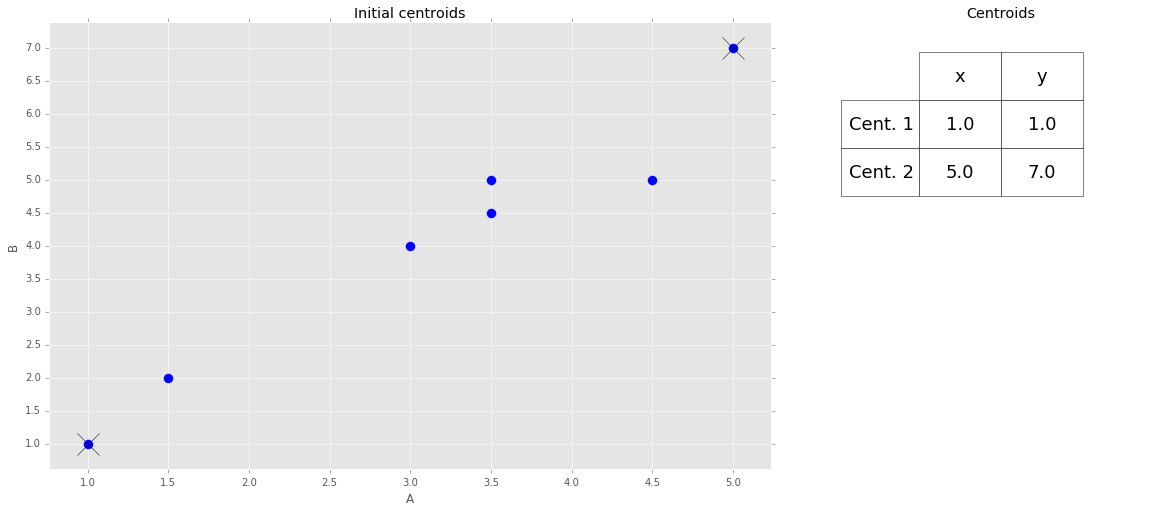

In [6]:
clf = KMeans(centroids, zip(A, B))
centroids = clf.getCentroids()
visualize('Initial centroids')

## First iteration

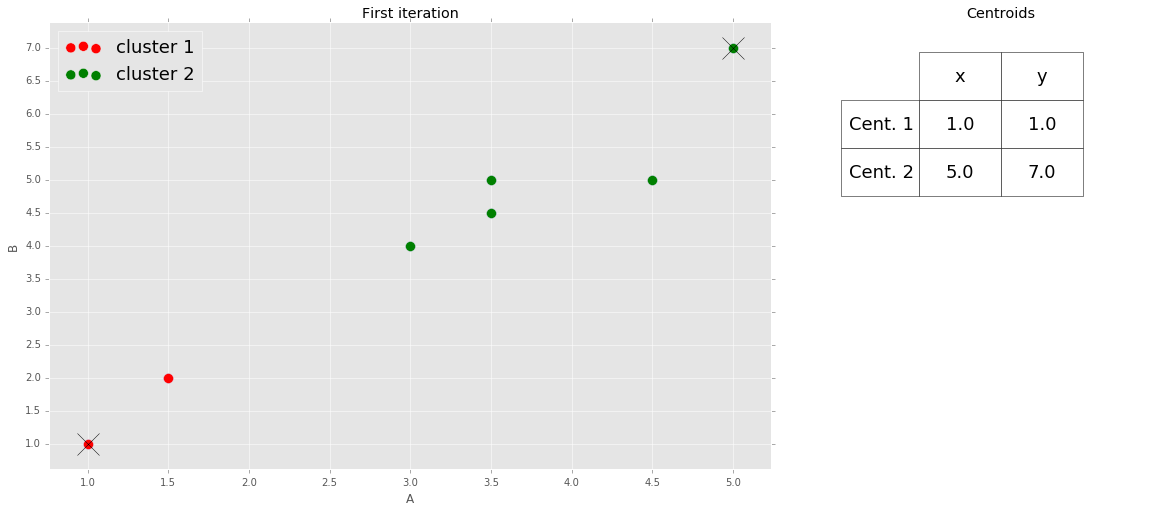

In [7]:
c1, c2 = clf.cluster()
visualize('First iteration', clustered=True)

## Second iteration

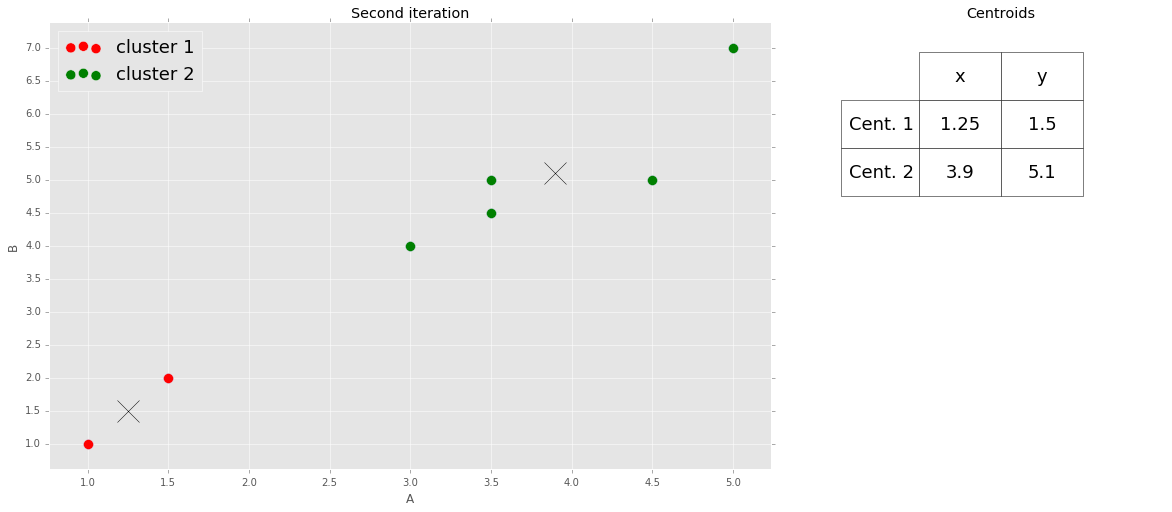

In [8]:
clf.updateCentroids()
centroids = clf.getCentroids()
c1, c2 = clf.cluster()
visualize('Second iteration', clustered=True)

## Third iteration

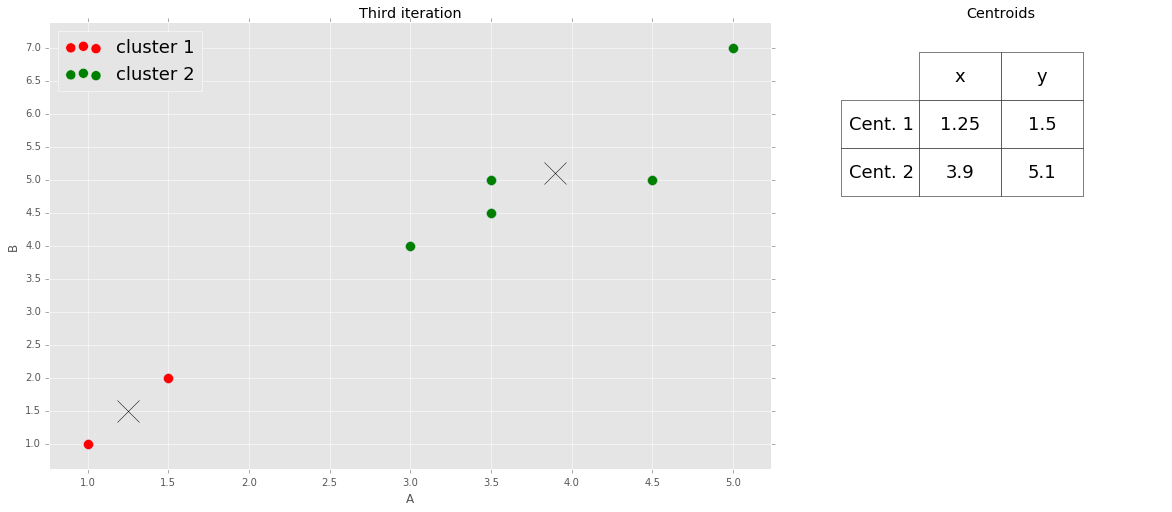

In [9]:
clf.updateCentroids()
centroids = clf.getCentroids()
c1, c2 = clf.cluster()
visualize('Third iteration', clustered=True)

## Results
It converges after second iteration.